<a href="https://colab.research.google.com/github/oktaviacitra/ai-course-in-graduate-school/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np

train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

In [4]:
from keras.models import Model
from keras.layers import Input, Activation, Dense

# Target Dimension
TARGET_DIM = 16

# Encoder
inputs = Input(shape=(784,))
h_encode = Dense(256, activation='relu')(inputs)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)
h_encode = Dense(32, activation='relu')(h_encode)

# Coded
encoded = Dense(TARGET_DIM, activation='relu')(h_encode)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='sigmoid')(h_decode)

# Autoencoder Model
autoencoder = Model(inputs=inputs, outputs=outputs)

# Encoder Model
encoder = Model(inputs=inputs, outputs=encoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 32)                544   

In [6]:
from google.colab import drive

origin_path = '/content/drive'
drive.mount(origin_path)
folder_path = origin_path + '/MyDrive/Learning Journey/AutoEncoder/'

Mounted at /content/drive


In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

# Compile the model Binary Crossentropy
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.4,   
                              patience=2, 
                              min_lr=0.0001,
                              verbose=1
                              )
best_weight = ModelCheckpoint(folder_path + "{epoch:02d}-{val_loss:.4f}.h5",
                              monitor="val_loss",
                              mode="min",
                              save_best_only=True,
                              verbose=1)
stop_early = EarlyStopping(monitor='val_loss', patience=5)

history = autoencoder.fit(train_x, train_x,
                          batch_size=256,
                          epochs=100,
                          verbose=1,
                          shuffle=True,
                          validation_data=(test_x, test_x),
                          callbacks=[stop_early, best_weight, reduce_lr])

Epoch 1/100
233/235 [============================>.] - ETA: 0s - loss: 0.2630
Epoch 1: val_loss improved from inf to 0.20865, saving model to /content/drive/MyDrive/Learning Journey/AutoEncoder/01-0.2087.h5
235/235 [==============================] - 8s 30ms/step - loss: 0.2627 - val_loss: 0.2087 - lr: 0.0010
Epoch 2/100
233/235 [============================>.] - ETA: 0s - loss: 0.1843
Epoch 2: val_loss improved from 0.20865 to 0.16477, saving model to /content/drive/MyDrive/Learning Journey/AutoEncoder/02-0.1648.h5
235/235 [==============================] - 7s 28ms/step - loss: 0.1842 - val_loss: 0.1648 - lr: 0.0010
Epoch 3/100
233/235 [============================>.] - ETA: 0s - loss: 0.1566
Epoch 3: val_loss improved from 0.16477 to 0.14841, saving model to /content/drive/MyDrive/Learning Journey/AutoEncoder/03-0.1484.h5
235/235 [==============================] - 7s 28ms/step - loss: 0.1566 - val_loss: 0.1484 - lr: 0.0010
Epoch 4/100
233/235 [============================>.] - ETA: 0s

In [9]:
# Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Reconstructed Data
reconstructed = autoencoder.predict(test_x)

313/313 [==============================] - 1s 3ms/step


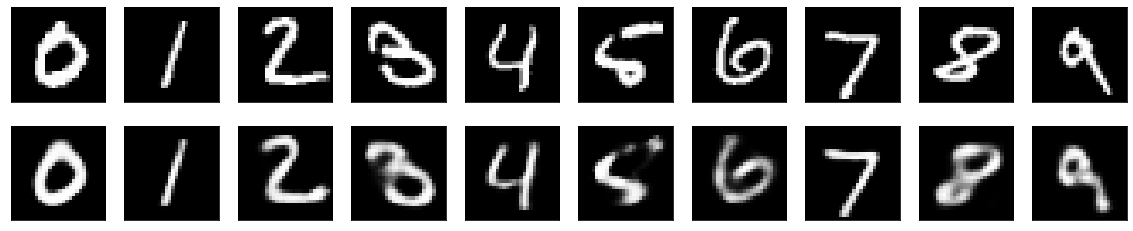

In [10]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
	count = 0
	while True:
		if i == test_y[count]:
			# Original
			ax = plt.subplot(2, n, i + 1)
			plt.imshow(test_x[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)

			# Reconstructed
			ax = plt.subplot(2, n, i + 1 + n)
			plt.imshow(reconstructed[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			break;

		count += 1
plt.show()

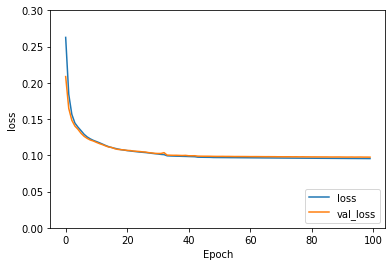

In [13]:
def graph_history(title, subtitle, interval):
  plt.plot(history.history[title], label = title)
  plt.plot(history.history[subtitle], label = subtitle)
  plt.xlabel('Epoch')
  plt.ylabel(title)
  plt.ylim(interval)
  plt.legend(loc='lower right')

graph_history('loss', 'val_loss', [0.0, 0.3])